In [1]:
conda install openpyxl#安装openpyxl用于读取excel

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    openpyxl-3.0.9             |     pyhd8ed1ab_0         153 KB  conda-forge
    ------------------------------------------------------------
                  

# Reference
### 参考文献

<img src="https://www.researchgate.net/publication/340027734/figure/fig3/AS:870948379033601@1584661683144/Structure-of-improved-1D-LeNet-5-network-for-rolling-element-bearing-fault-diagnosis.png" width="35%"/>

# Load Data
### 加载数据

In [2]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading Dataset

In [3]:
train_data = np.array(pd.read_excel("../input/ramandata/train_data.xlsx"))
train_lable = np.array(pd.read_excel("../input/ramandata/train_label.xlsx", header=None))
test_data = np.array(pd.read_excel("../input/ramandata/test_data.xlsx"))
test_lable = np.array(pd.read_excel("../input/ramandata/test_label.xlsx", header=None))

In [4]:
#归一化
train_data = train_data/train_data.max()
test_data = test_data/test_data.max()

In [5]:
#数据整形
train_lable = train_lable.reshape(train_lable.shape[0])
test_lable = test_lable.reshape(test_lable.shape[0])
train_data = train_data.reshape(-1, train_data.shape[1], 1)
test_data = test_data.reshape(-1, test_data.shape[1], 1)

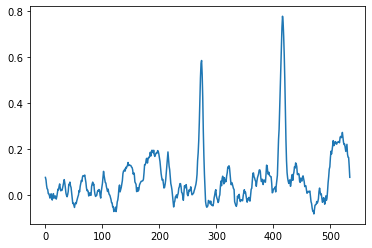

In [6]:
plt.plot(train_data[0])

In [7]:
#绘图函数
def print_history(history):
    # 绘制训练 & 验证的准确率值
    plt.plot(history.history['accuracy'], c='r')
    plt.plot(history.history['val_accuracy'], c='orange')
    plt.plot(history.history['loss'], c='g')
    plt.plot(history.history['val_loss'], c='b')
    plt.title('Model accuracy&loss')
    plt.xlabel('Epoch')
    plt.legend(['Train_acc', 'Val_acc', 'Train_loss', 'Val_loss'])
    plt.show()

# Get The best **Batch Size**
### 获取最佳batch size参数

In [8]:
def train_LeNet_batch_size(batch_size):
    model = Sequential()
    model.add(keras.layers.Conv1D(6, kernel_size=64, activation='relu', input_shape=train_data.shape[1:], padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 8))

    model.add(keras.layers.Conv1D(16, kernel_size=64, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(64, kernel_size=16, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 8, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 4, activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss=keras.metrics.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.2), metrics=['accuracy'])
    
    history = model.fit(train_data,train_lable,validation_data = (test_data,test_lable),epochs=10,batch_size=batch_size, verbose=0, shuffle=False)
    model.evaluate(test_data, test_lable)
    print('Batch Size:', batch_size)
    print(history.params)
    print_history(history) #调用绘图函数

In [9]:
#Try to know the range of batch size!!!             ABOUT 10-20
# train_LeNet_batch_size(1)
# train_LeNet_batch_size(5)
# train_LeNet_batch_size(10)
# train_LeNet_batch_size(20)

5/5 [==============================] - 0s 6ms/step - loss: 0.2657 - accuracy: 0.9108
Batch Size: 10
{'verbose': 0, 'epochs': 10, 'steps': 63}


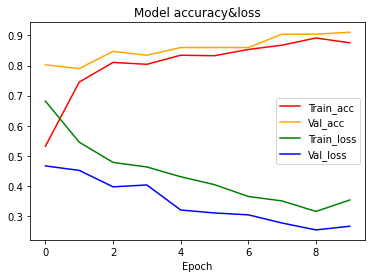

5/5 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8917
Batch Size: 11
{'verbose': 0, 'epochs': 10, 'steps': 58}


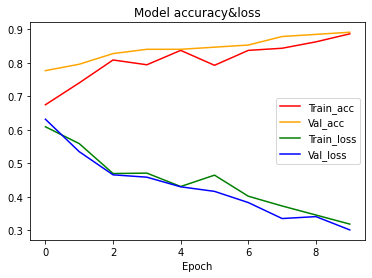

5/5 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8854
Batch Size: 12
{'verbose': 0, 'epochs': 10, 'steps': 53}


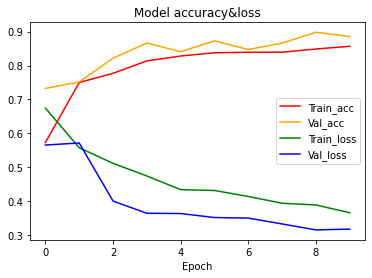

5/5 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8917
Batch Size: 13
{'verbose': 0, 'epochs': 10, 'steps': 49}


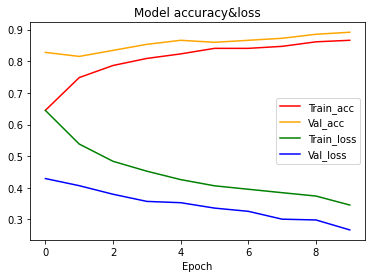

5/5 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8599
Batch Size: 14
{'verbose': 0, 'epochs': 10, 'steps': 45}


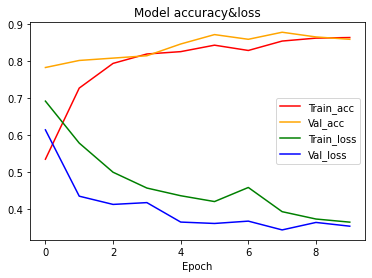

5/5 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.9172
Batch Size: 15
{'verbose': 0, 'epochs': 10, 'steps': 42}


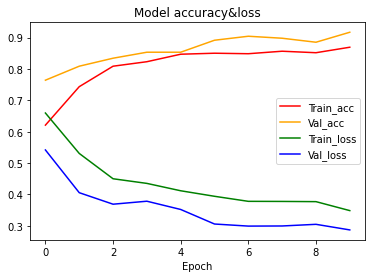

5/5 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8790
Batch Size: 16
{'verbose': 0, 'epochs': 10, 'steps': 40}


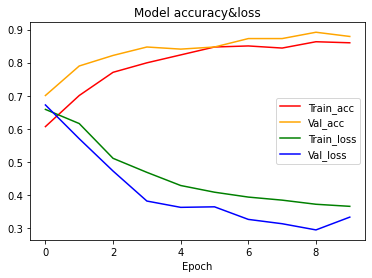

5/5 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8662
Batch Size: 17
{'verbose': 0, 'epochs': 10, 'steps': 37}


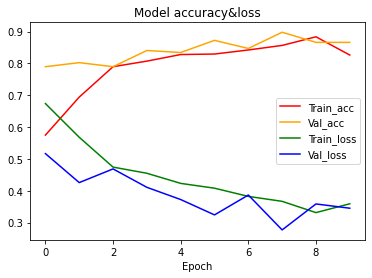

5/5 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8917
Batch Size: 18
{'verbose': 0, 'epochs': 10, 'steps': 35}


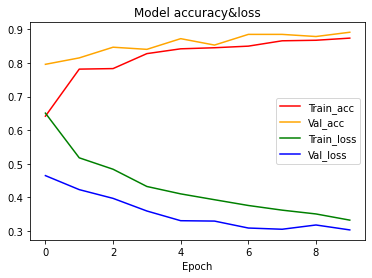

5/5 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8790
Batch Size: 19
{'verbose': 0, 'epochs': 10, 'steps': 34}


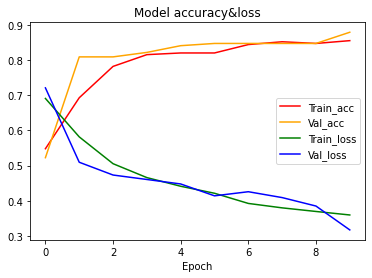

In [10]:
for i in range(10):
    train_LeNet_batch_size(10+i)

### Best batch size:**14**

# Get The best **Learning Rate**
### 获取最佳learning rate

In [11]:
def train_LeNet_learing_rate(learning_rate):
    model = Sequential()
    model.add(keras.layers.Conv1D(6, kernel_size=64, activation='relu', input_shape=train_data.shape[1:], padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 8))

    model.add(keras.layers.Conv1D(16, kernel_size=64, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(64, kernel_size=16, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 8, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 4, activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss=keras.metrics.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=learning_rate), metrics=['accuracy'])
    
    history = model.fit(train_data,train_lable,validation_data = (test_data,test_lable),epochs=10,batch_size=14, verbose=0, shuffle=False)
    model.evaluate(test_data, test_lable)
    print('Learning Rate', learning_rate)
    print(history.params)
    print_history(history) #调用绘图函数

In [12]:
#Try to know the range of learning rate!!!             ABOUT 0.01-0.1
# train_LeNet_learing_rate(0.001)
# train_LeNet_learing_rate(0.01)
# train_LeNet_learing_rate(0.1)
# train_LeNet_learing_rate(1)
# train_LeNet_learing_rate(10)

5/5 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.8025
Learning Rate 0.01
{'verbose': 0, 'epochs': 10, 'steps': 45}


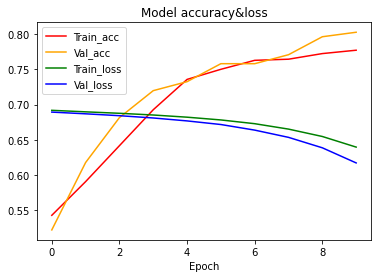

5/5 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8599
Learning Rate 0.02
{'verbose': 0, 'epochs': 10, 'steps': 45}


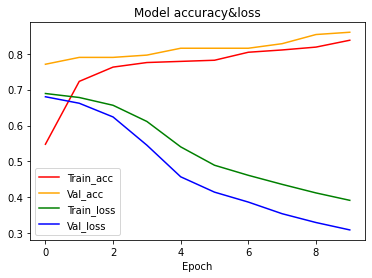

5/5 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8790
Learning Rate 0.03
{'verbose': 0, 'epochs': 10, 'steps': 45}


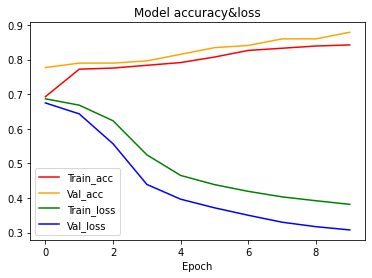

5/5 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.9045
Learning Rate 0.04
{'verbose': 0, 'epochs': 10, 'steps': 45}


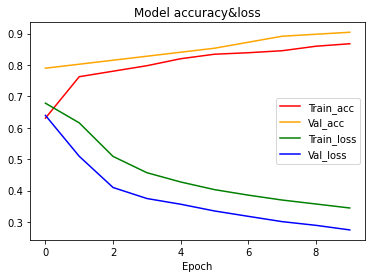

5/5 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.8981
Learning Rate 0.05
{'verbose': 0, 'epochs': 10, 'steps': 45}


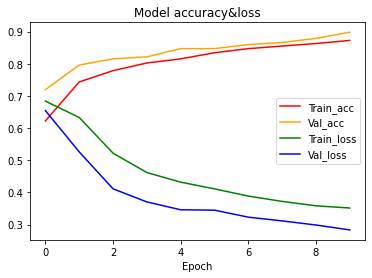

5/5 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8981
Learning Rate 0.060000000000000005
{'verbose': 0, 'epochs': 10, 'steps': 45}


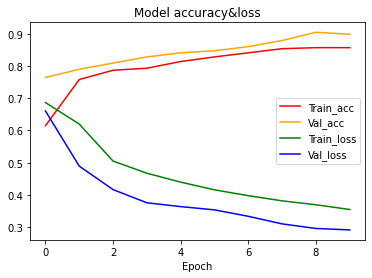

5/5 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8854
Learning Rate 0.06999999999999999
{'verbose': 0, 'epochs': 10, 'steps': 45}


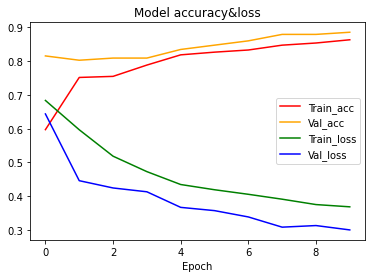

5/5 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9045
Learning Rate 0.08
{'verbose': 0, 'epochs': 10, 'steps': 45}


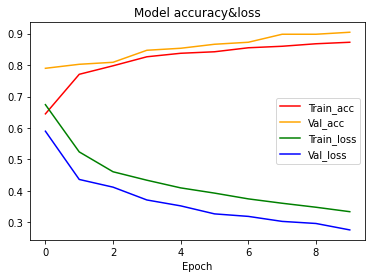

5/5 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9108
Learning Rate 0.09
{'verbose': 0, 'epochs': 10, 'steps': 45}


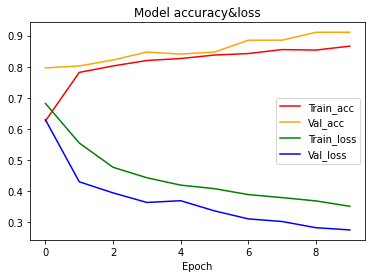

5/5 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8790
Learning Rate 0.09999999999999999
{'verbose': 0, 'epochs': 10, 'steps': 45}


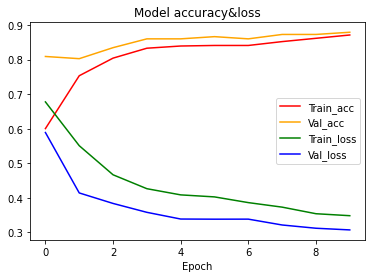

In [13]:
for i in range(10):
    train_LeNet_learing_rate(0.01+i*0.01)

### Best learning rate:**0.08**

# Get The best **Epochs**
### 绘制图像获知最佳epochs

In [14]:
def train_LeNet(epochs):
    model = Sequential()
    model.add(keras.layers.Conv1D(6, kernel_size=64, activation='relu', input_shape=train_data.shape[1:], padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 8))

    model.add(keras.layers.Conv1D(16, kernel_size=64, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(64, kernel_size=16, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 8, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 4, activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss=keras.metrics.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.08), metrics=['accuracy'])
    
    history = model.fit(train_data,train_lable,validation_data = (test_data,test_lable),epochs=epochs,batch_size=14, verbose=0, shuffle=False)
    model.evaluate(test_data, test_lable)
    print(history.params)
    print_history(history) #调用绘图函数

5/5 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9809
{'verbose': 0, 'epochs': 100, 'steps': 45}


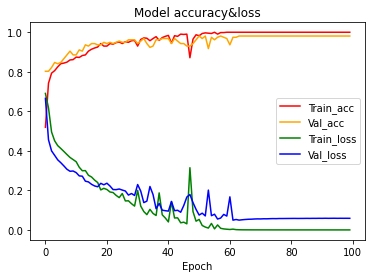

In [15]:
train_LeNet(100)

### Best epochs:**ABOUT 45-60?**